In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [143]:
class Neuron:
    
    def __init__(self, E_m, L, d, r_m, r_a, c_m):
        self.E_m = E_m
        self.L   = L
        self.d   = d
        self.r_m = r_m
        self.r_a = r_a
        self.c_m = c_m
        
        rad = self.d/2
        
    def simulate(self, I_t, dt, time):
        '''Simulate membrane voltage response to an arbitraty input current'''
        
        V_t = self.E_m
        rad = self.d/2
        R_m = self.r_m/(2*np.pi*rad*self.L)
        C_m = self.c_m*(2*np.pi*rad*self.L)
        tau = R_m*C_m
        
        V_course = []
        for i in np.arange(0, time, dt):
            V_t1 = V_t + dt*((self.E_m - V_t)/tau + I_t/C_m)
            V_course.append(V_t1)
            V_t = V_t1
            
        figure = plt.figure(figsize=(20, 8))
        plt.ylim(-abs(min(V_course)*1.5), abs(min(V_course)*1.5))
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
        plt.grid(alpha=0.4)
        plt.title('Injected current', fontsize=20)
        plt.xlabel('Time / ms', fontsize=15)
        plt.ylabel('Membrane voltage response / V', fontsize=15)
        xi = np.arange(0, len(V_course))/(1/(dt*1000))
        plt.plot(xi, V_course)
        return V_course
    
    def simulate_sin(self, A, f, dt, time):
        '''Simulate membrane voltage response to a sinusoid input current'''
        V_t  = self.E_m
        rad  = self.d/2
        R_m = self.r_m/(2*np.pi*rad*self.L)
        C_m = self.c_m*(2*np.pi*rad*self.L)
        tau  = R_m*C_m
        step = 0
        
        V_course = []
        for i in np.arange(0, time, dt):
            I_t   = A*np.sin(2*np.pi*f*step)
            V_t1 = V_t + (dt*(self.E_m - V_t + R_m*I_t))/tau
            V_course.append(V_t1)
            V_t = V_t1
            step += dt
        
        figure = plt.figure(figsize=(20, 8))
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
        plt.grid(alpha=0.4)
        plt.title('Injected sine current at %.1f Hertz' %f, fontsize=20)
        plt.xlabel('Time / ms', fontsize=15)
        plt.ylabel('Membrane voltage response / V', fontsize=15)
        xi = np.arange(0, len(V_course))/(1/(dt*1000))
        plt.plot(xi, V_course)
        return V_course
    
    def simulate_two_compartment(self, I_t, dt, t_e, t_s, r_m, r_a, c_m, time):
        
        V1_t = self.E_m
        V2_t = self.E_m
        tau = r_m * c_m
        V1_course = []
        V2_course = []
        for j in np.arange(0, time, dt):
            if j < (t_e):
                curr_I = I_t[0]
            elif (t_e) <= j < (t_s):
                curr_I = I_t[1]
            else:
                curr_I = I_t[2]
            V1_t1 = V1_t + dt*((self.E_m - V1_t)/tau + (V2_t - V1_t)/(r_a*c_m) + curr_I/c_m)
            V1_course.append(V1_t1)
            V1_t = V1_t1

            V2_t1 = V2_t + dt*((V1_t - V2_t)/(r_a*c_m) + (self.E_m - V2_t)/tau)
            V2_course.append(V2_t1)
            V2_t = V2_t1
                
        figure = plt.figure(figsize=(13, 7))
        plt.ylim(-abs(min(V1_course)*1.5), abs(min(V1_course)*1.5))
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
        plt.grid(alpha=0.4)
        plt.title('Injected current', fontsize=20)
        plt.xlabel('Time / ms', fontsize=15)
        plt.ylabel('Membrane voltage response / V', fontsize=15)
        
        xi = np.arange(0, len(V1_course))/(1/(dt*1000))
        plt.plot(xi, V1_course, label="Compartment 1")
        plt.plot(xi, V2_course, label='Compartment 2')
        plt.axvline(x=t_e*1000, color='r', linestyle='--', alpha=0.4)
        plt.axvline(x=t_s*1000, color='r', linestyle='--', alpha=0.4)
        
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.xlim(200, 700)
        plt.legend(prop={'size': 12})
        plt.savefig('Ra_30G.png')
        return V1_course, V2_course

    def simulate_two_compartment_sin(self, A, f, dt, r_m, r_a, c_m, time):
        V1_t = self.E_m
        V2_t = self.E_m
        tau = r_m * c_m
        V1_course = []
        V2_course = []
        for j in np.arange(0, time, dt):
            curr_I = A*np.sin(2*np.pi*f*j)
            V1_t1 = (V1_t + dt*((self.E_m - V1_t)/tau + (V2_t - V1_t)/(r_a*c_m) + curr_I/c_m))
            V1_course.append(V1_t1)
            V1_t = V1_t1
            V2_t1 = (V2_t + dt*((V1_t - V2_t)/(r_a*c_m) + (self.E_m - V2_t)/tau))
            V2_course.append(V2_t1)
            V2_t = V2_t1
            
        figure = plt.figure(figsize=(13, 7))
        plt.axhline(y=0, color='k', linestyle='--', alpha=0.4)
        plt.grid(alpha=0.4)
        plt.title('Injected current', fontsize=20)
        plt.xlabel('Time / ms', fontsize=15)
        plt.ylabel('Membrane voltage response / V', fontsize=15)
        
        xi = np.arange(0, len(V1_course))/(1/(dt*1000))
        plt.plot(xi, V1_course, label="Compartment 1")
        plt.plot(xi, V2_course, label='Compartment 2')
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.legend(prop={'size': 12})
        plt.savefig('Sin_Ra_300M.png')
        return V1_course, V2_course

In [144]:
E_m = 0
L   = 100*10**-6
d   = 2*10**-6
r_m = 1
r_a = 1
c_m = 10**-2

a = Neuron(E_m, L, d, r_m, r_a, c_m)

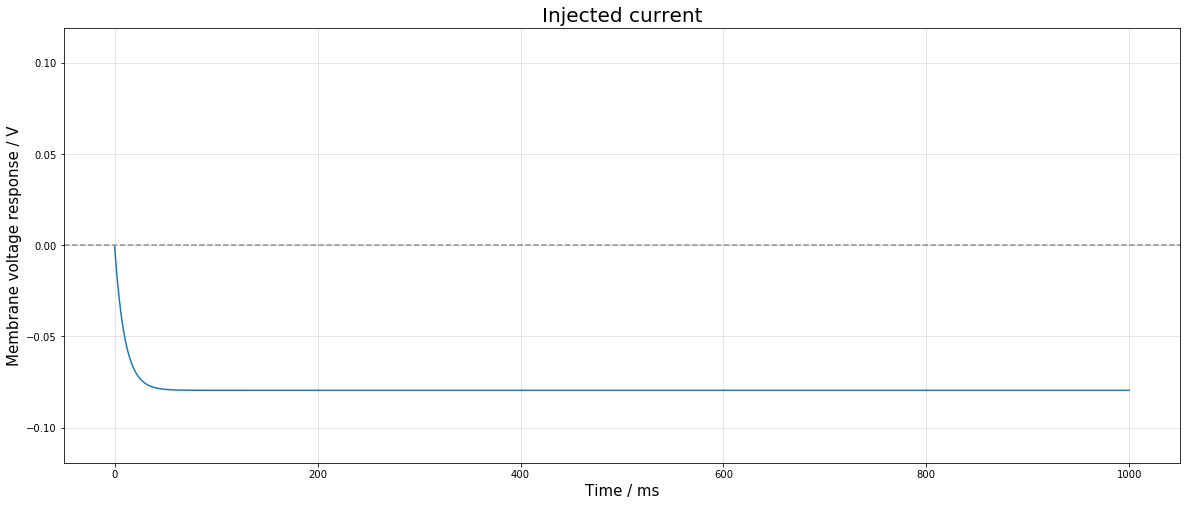

In [98]:
I_t    = -50*10**-12
dt     = 0.0001
time   = 1
v      = a.simulate(I_t, dt, time)

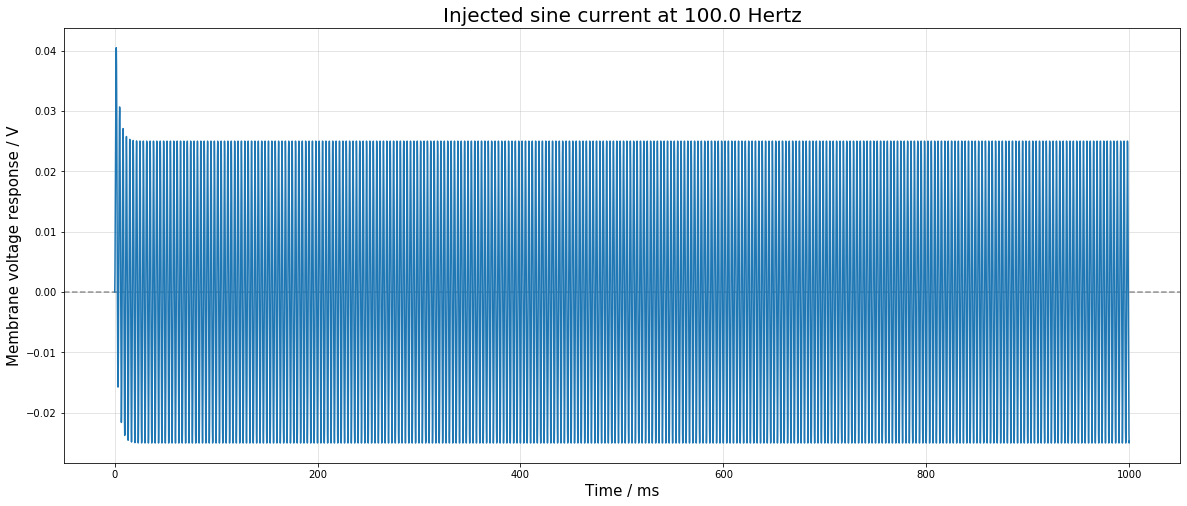

In [99]:
f      = 100
A      = 100*10**-12
dt     = 0.00001
time   = 3
v = a.simulate_sin(A, f, dt, time)

In [90]:
def get_amplitude(neuron, f):
    amp = []
    for i in range(len(f)):
        curr_f = f[i]
        V = a.simulate_sin(A, curr_f, dt, time)
        tmp = V[800:]
        amp.append(max(tmp))
    return amp

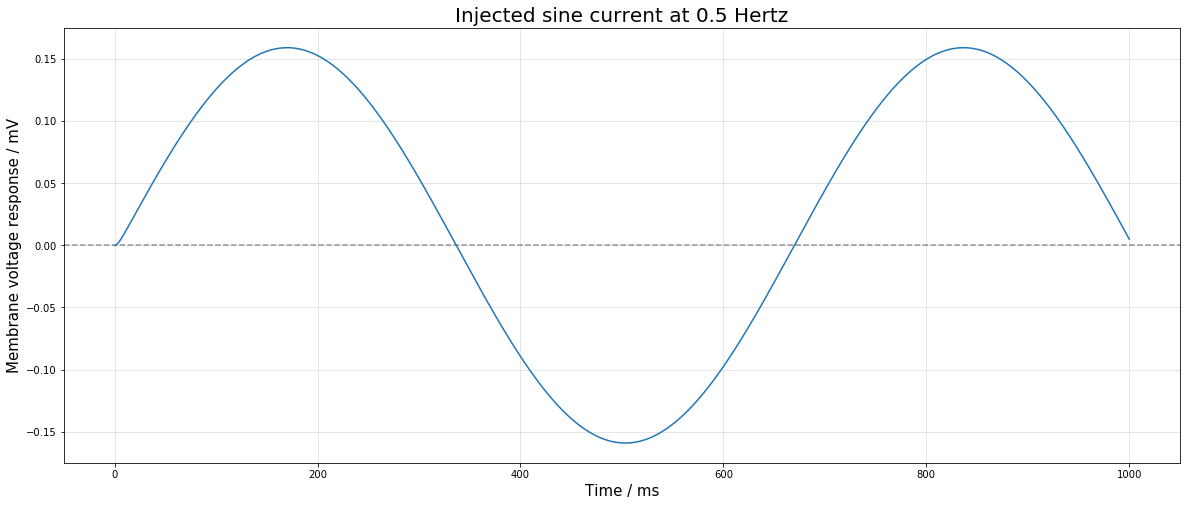

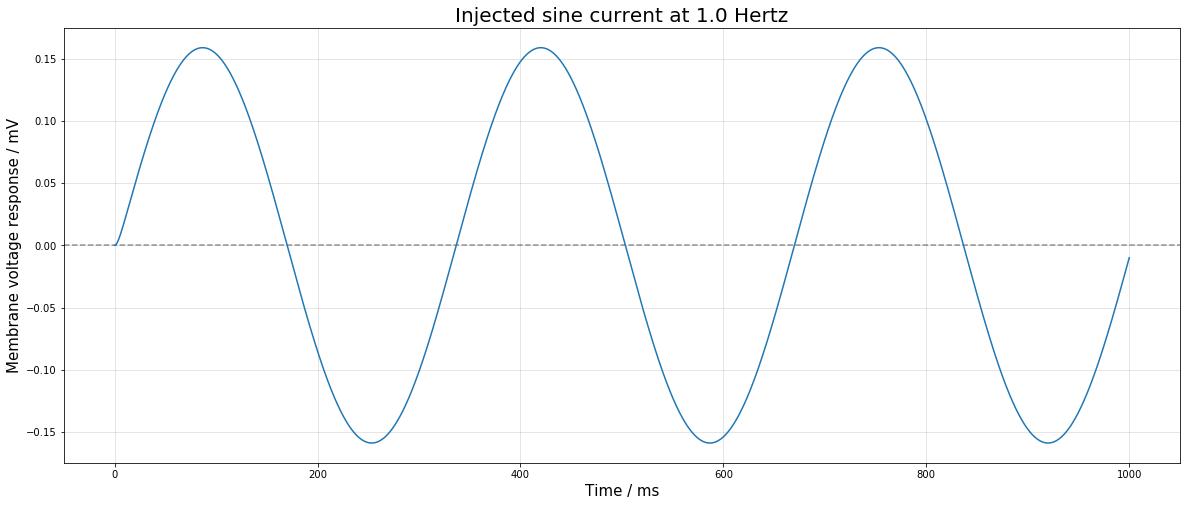

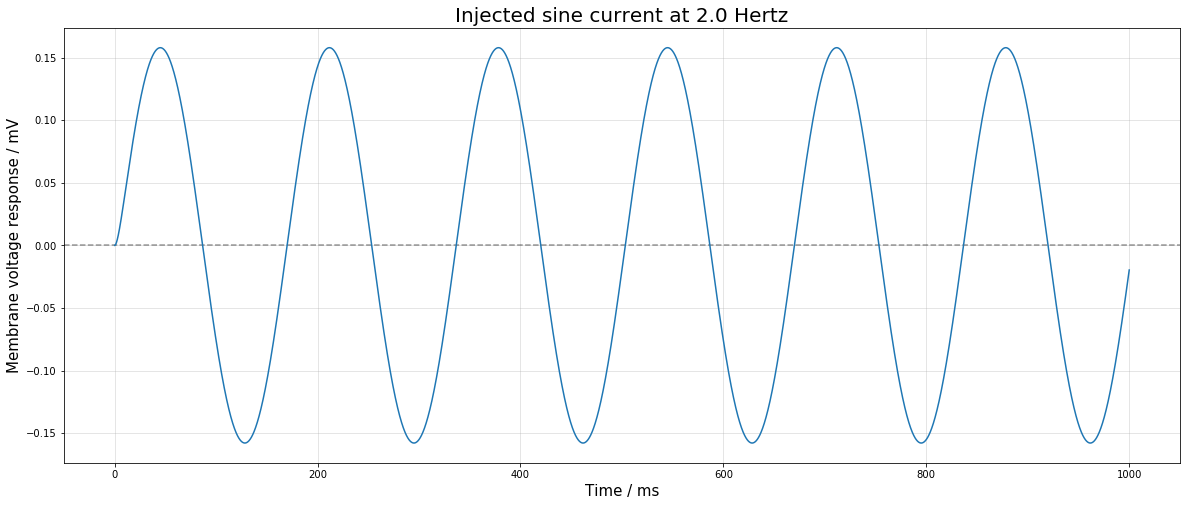

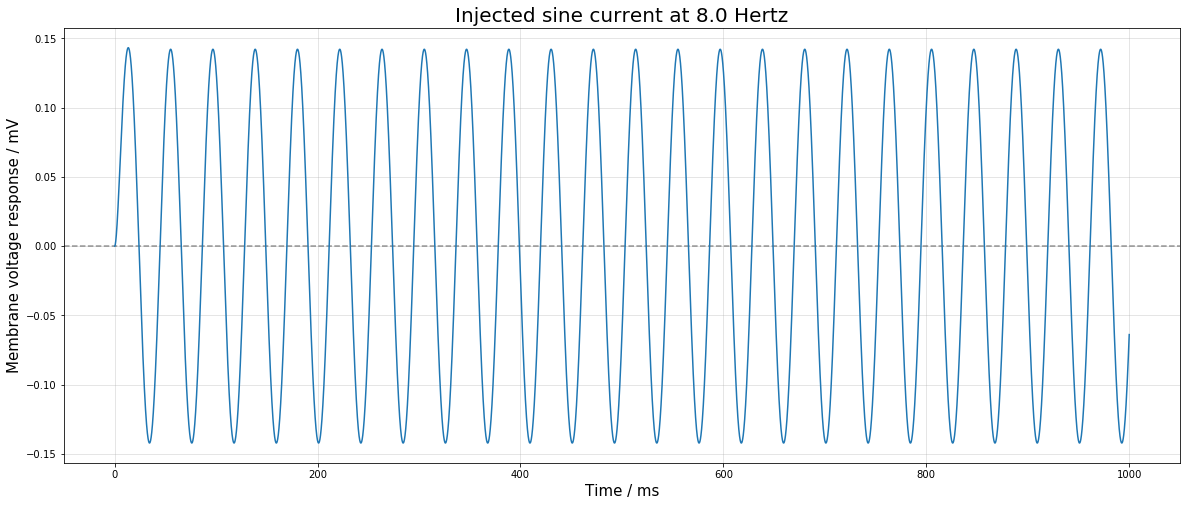

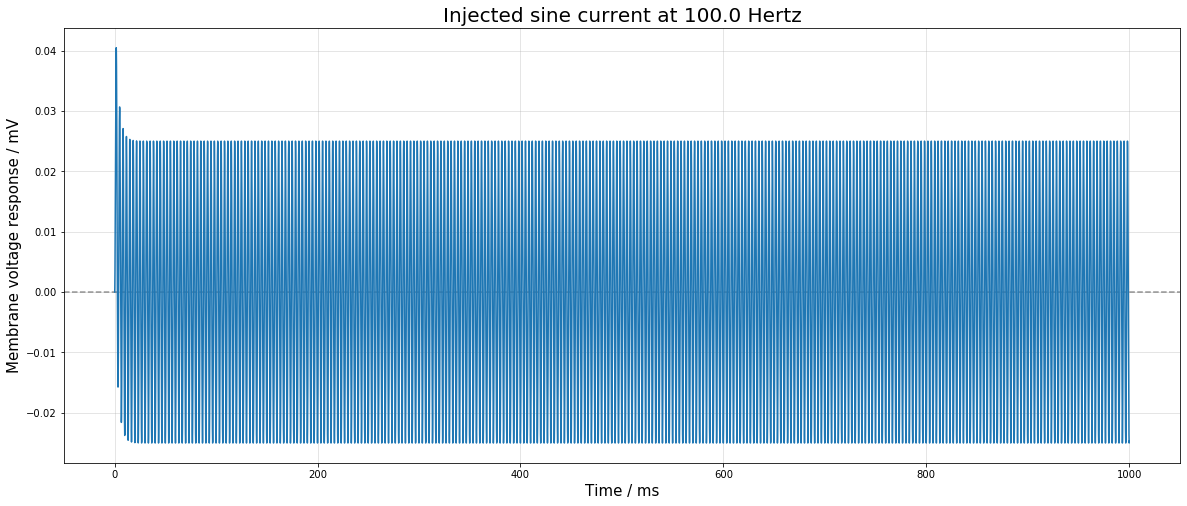

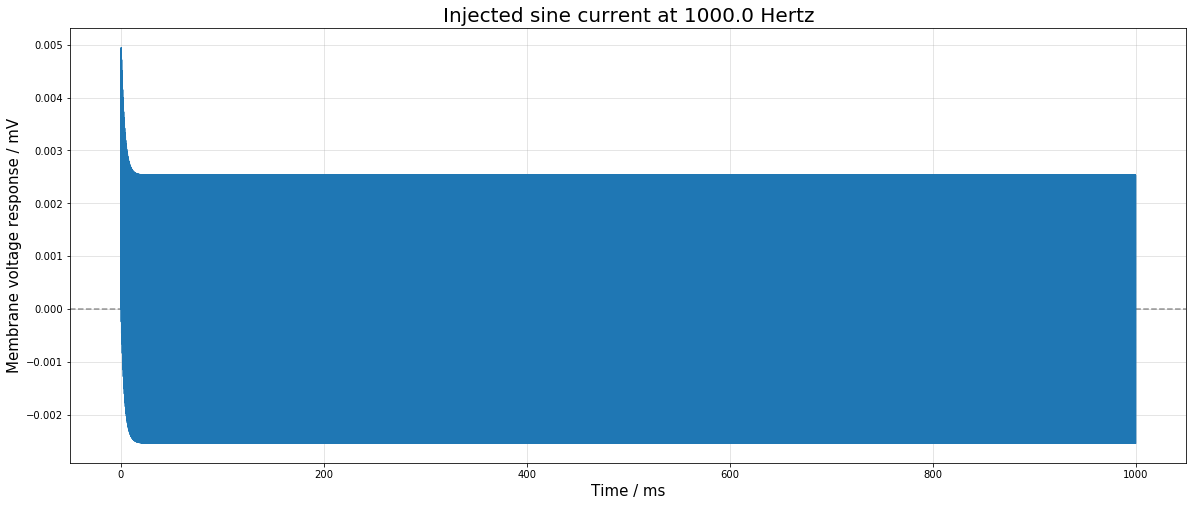

In [91]:
f = [0.5, 1, 2, 8, 100, 1000]
amp = get_amplitude(a, f)

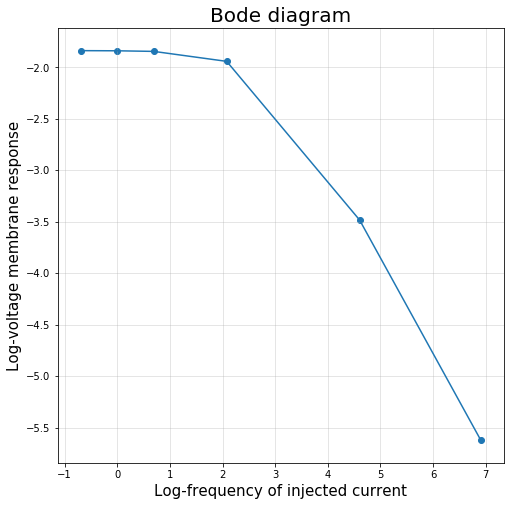

In [92]:
figure = plt.figure(figsize=(8, 8))
plt.grid(alpha=0.4)
plt.xlabel('Log-frequency of injected current', fontsize=15)
plt.ylabel('Log-voltage membrane response', fontsize=15)
plt.title('Bode diagram', fontsize=20)
plt.plot(np.log(f), np.log(amp))
plt.scatter(np.log(f), np.log(amp))

/Users/GA/miniconda3/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:106: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


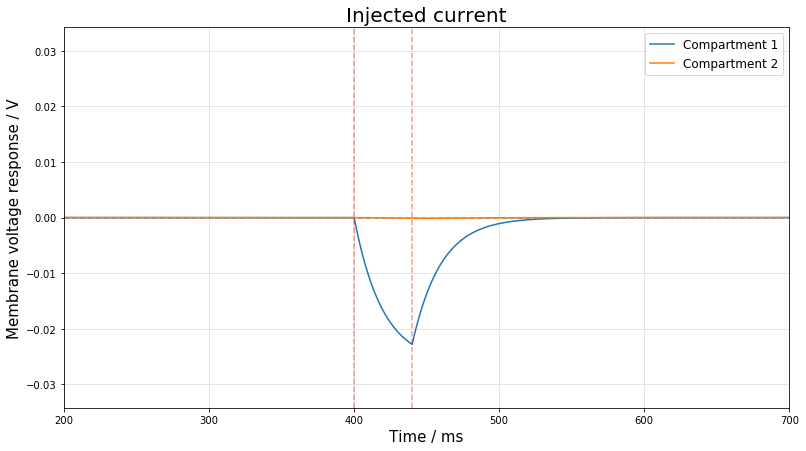

In [142]:
r_m   = 265*10**6
r_a   = 30*10**9
c_m   = 75*10**-12
I_t   = [0, -100*10**-12, 0]
t_e   = 0.4
t_s   = 0.44
dt    = 0.00001
time  = 1 #s

v1, v2 = a.simulate_two_compartment(I_t, dt, t_e, t_s, r_m, r_a, c_m, time)

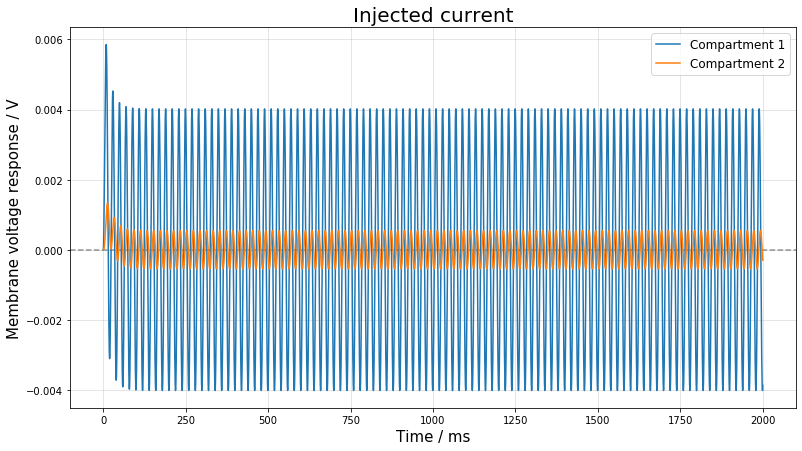

In [145]:
r_m  = 265*10**6
r_a  = 300*10**6
c_m  = 75*10**-12
A    = 100*10**-12
f    = 50
dt   = 0.0001
time = 2 #s

v1, v2 = a.simulate_two_compartment_sin(A, f, dt, r_m, r_a, c_m, time)

In [128]:
def get_amplitude(neuron, f):
    amp1 = []
    amp2 = []
    for i in range(len(f)):
        curr_f = f[i]
        v1, v2 = a.simulate_two_compartment_sin(A, curr_f, 0.000001, r_m, r_a, c_m, time)
        tmp1 = v1[500000:]
        tmp2 = v2[500000:]
        amp1.append(max(tmp1))
        amp2.append(max(tmp2))
    return amp1, amp2

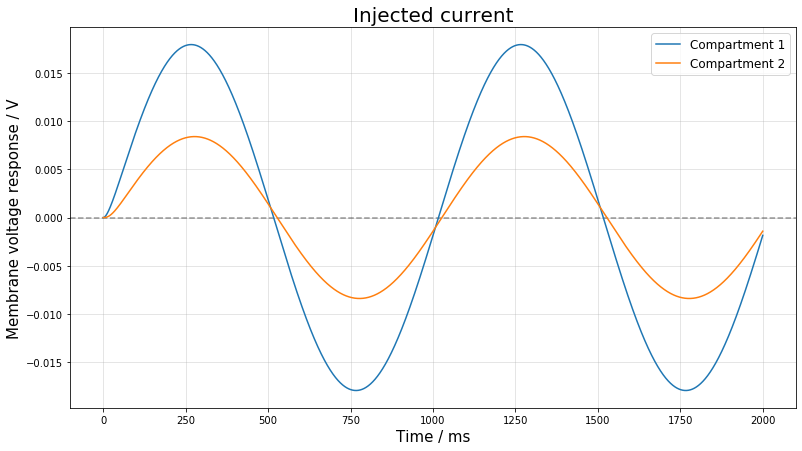

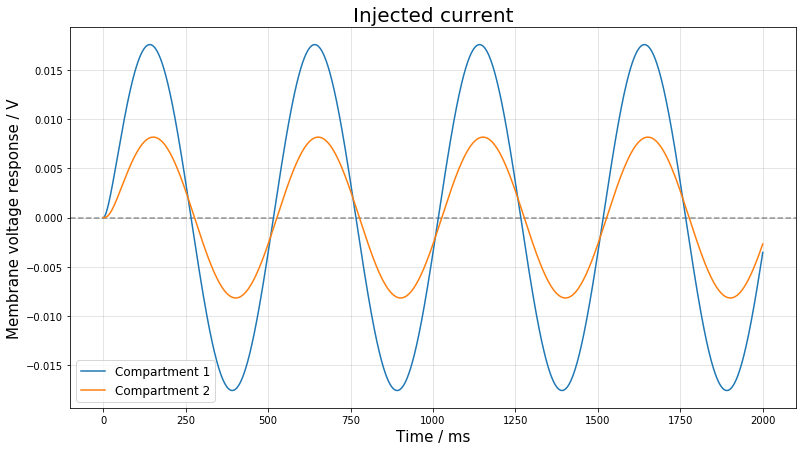

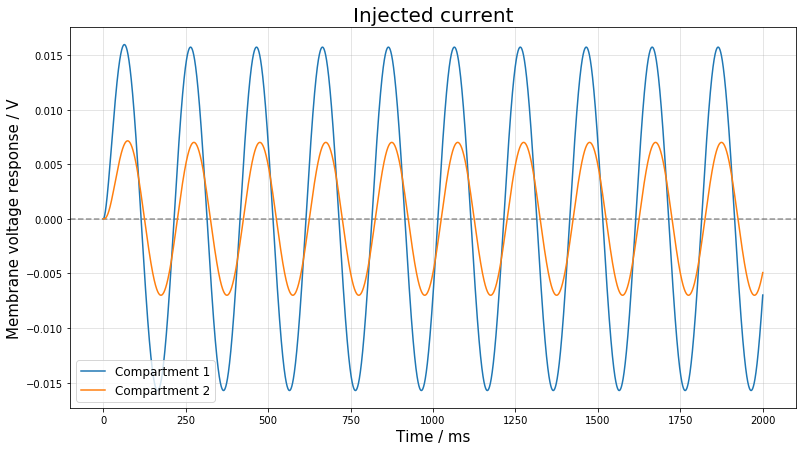

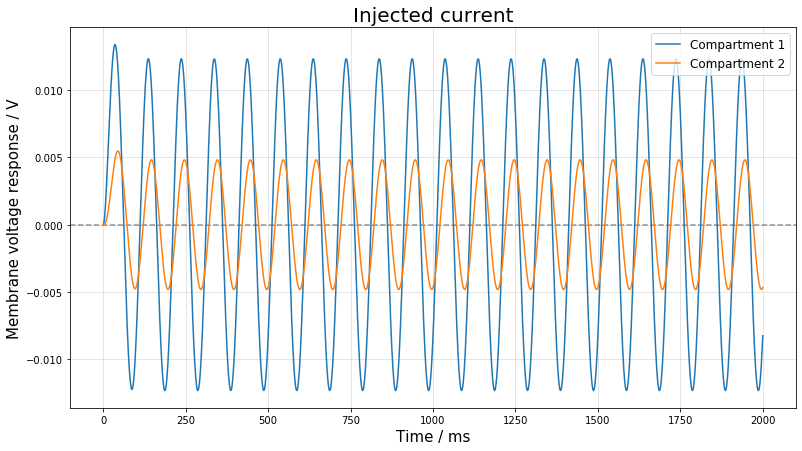

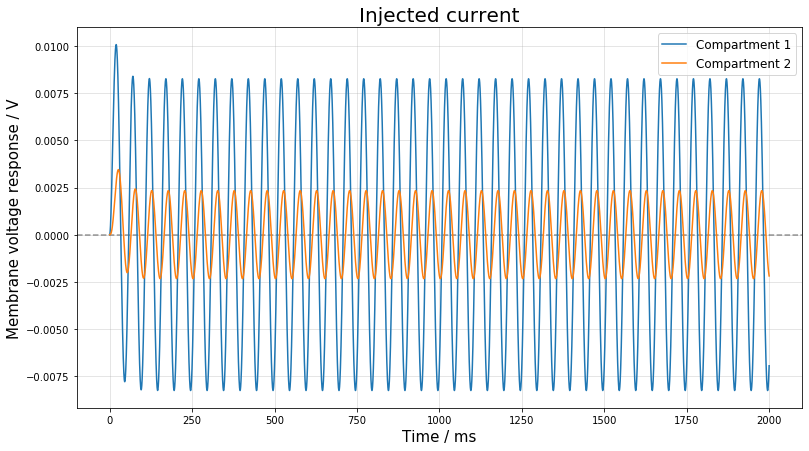

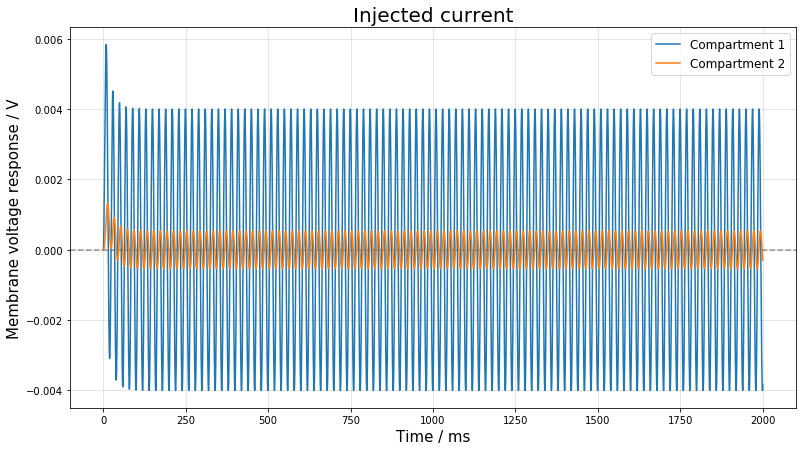

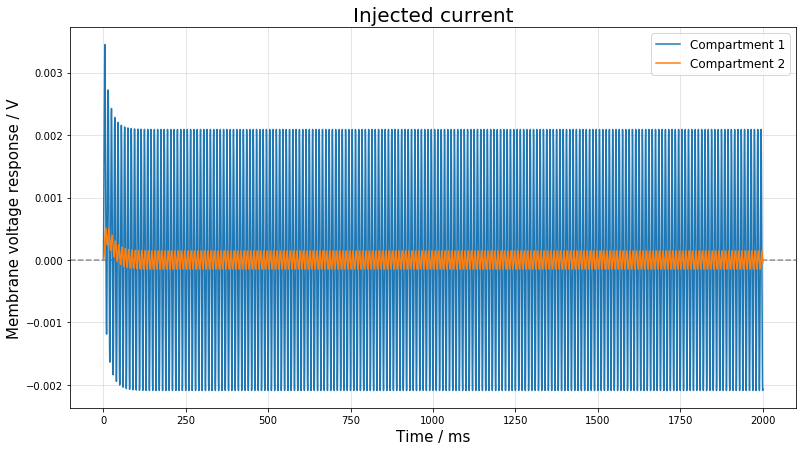

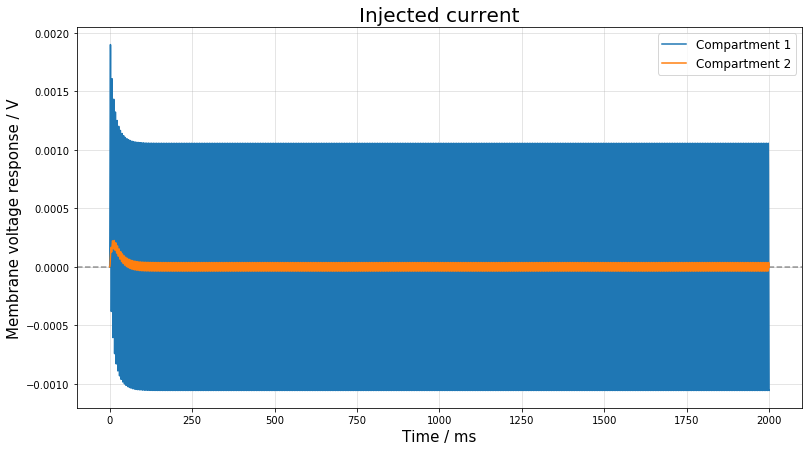

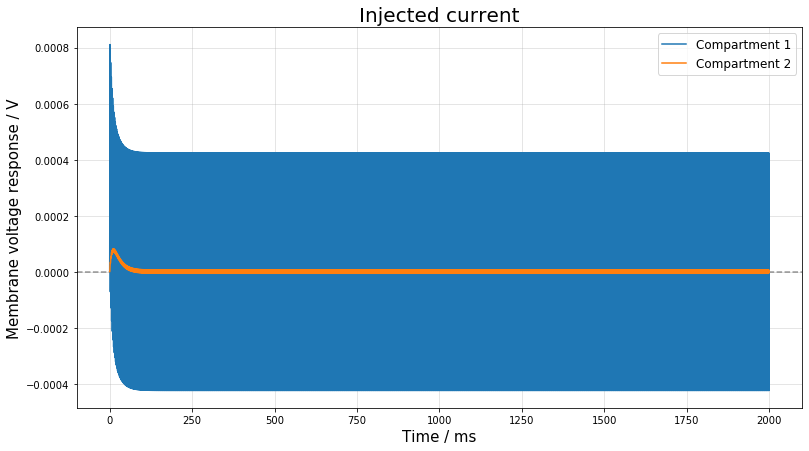

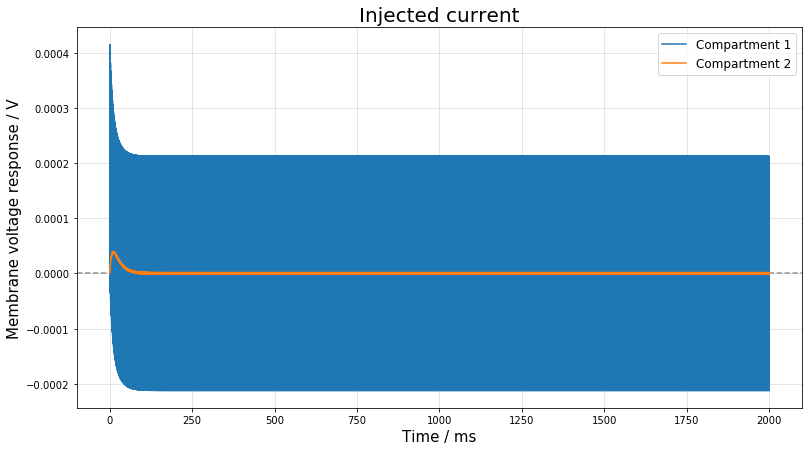

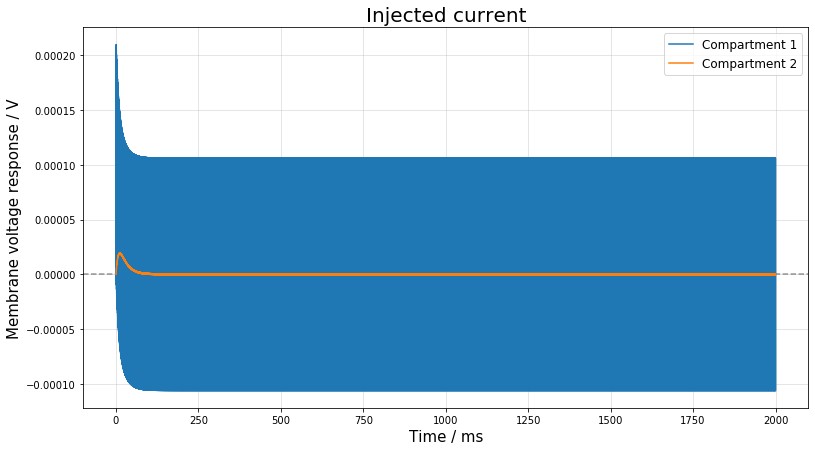

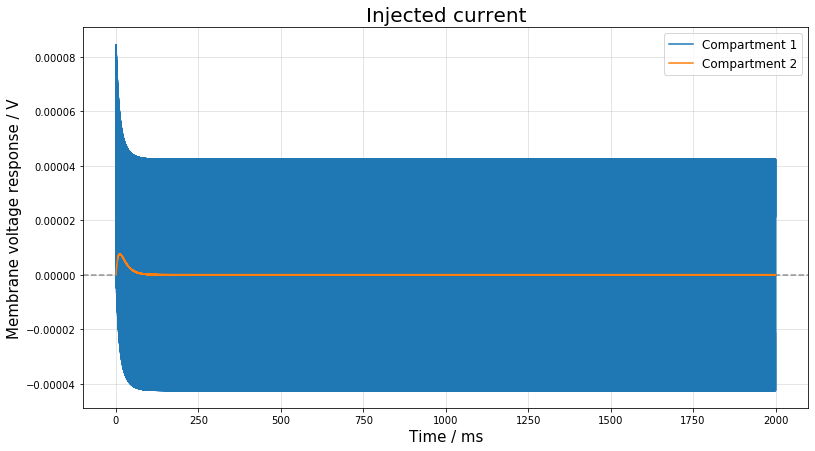

In [129]:
f = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
amp1, amp2 = get_amplitude(a, f)

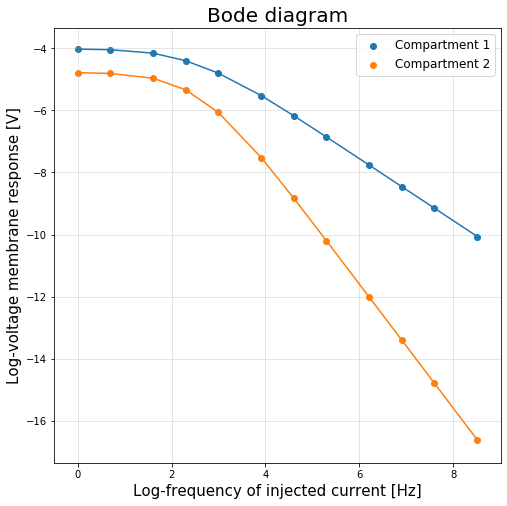

In [127]:
figure = plt.figure(figsize=(8, 8))
plt.grid(alpha=0.4)
plt.xlabel('Log-frequency of injected current [Hz]', fontsize=15)
plt.ylabel('Log-voltage membrane response [V]', fontsize=15)
plt.title('Bode diagram', fontsize=20)
plt.plot(np.log(f), np.log(amp1))
plt.scatter(np.log(f), np.log(amp1), label='Compartment 1')
plt.plot(np.log(f), np.log(amp2))
plt.scatter(np.log(f), np.log(amp2), label='Compartment 2')
plt.legend(prop={'size': 12})
plt.savefig('Bode.png')